<a href="https://colab.research.google.com/github/vanmai07/data-analysis-basic/blob/main/Copy_of_GROUP4A_FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
order = pd.read_csv('https://raw.githubusercontent.com/anhquan0412/dataset/main/Brazillian_Ecommerce/olist_orders_dataset.csv')
order_items = pd.read_csv('https://raw.githubusercontent.com/anhquan0412/dataset/main/Brazillian_Ecommerce/olist_order_items_dataset.csv')
order_payments = pd.read_csv('https://raw.githubusercontent.com/anhquan0412/dataset/main/Brazillian_Ecommerce/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('https://raw.githubusercontent.com/anhquan0412/dataset/main/Brazillian_Ecommerce/olist_order_reviews_dataset.csv')

# I. OverView and Clean Data

##A-Overview

Data Story:

> 1. Overview Monthly Revenue breakdown from 2017-08/2018
          *Due to after lanuching there was not much signicant sale in 2016, even no sale in 11 & 12/2016. Thus, only collect data from 01/2017 to 08/2018 which already remove order has status cancelled and unvailable.

          *During operation time, there was emerging growth 5 times after 8 months. After that there was a slightly drop but the monthly Revenue is around 8 Millions and above.
          *Comparing 2017 VS 2018, we experience that from May to August has pattern of low sale season and gradually grown before hitting in last 3 months of the year.


> 2. With the emerging growth trend of platform, we explore a few elements which might contribute to the sucess. 

          *Delivery processing leadtime is one of elements to platform's sucess. Since the time meet to customers expectation.
      
          *Overall, the late delivery compare to customer expectation is at 7% compare to On-time delivery. This could be a reason while this Ecoomerce perfomance well in Brazil for a short time. They was able provide an excellent delivery service within leadtime as promised to customers.

          *However, from 2017-11 to 2018-03 there was an inreasing of late delivery and also during these peak sale season of the year.

          *After 2018-03, the late delivery had declined but extremly but compare to last year 2017 still higher.

          *Inclusion, maybe we should have an optimise process to improve the delivery leadtime since Revenue showed decline trend after 2018-05.

          *By reviewing on internal order process we found that #79% shipping trễ hơn thời gian limit cho phép & #100% lỗi đơn trễ là do shipping time cao hơn thời gian cho phép



> 3. Another element contribute to customer satisfaction is payment method variety.
            *Credit card is the number 1 choice for payment type on platform and this reflect that Brazil customers enjoy consuming on credit. 
            *Boleto and debit card are both online cash payment method but boleto payment tyoe is one fifth compare to credit card and much more selected by customers compared to debit card.
            *While voucher is also one of the options for consumer to enjoy shopping online.
            *Most of credit card type has function offer installment and 62% Revenue was contributed from Installment payment this can be an USP for platform to offer to customer 0% interest rate this can increase average order value per transaction.



> 4. With payment installment is most popular payment option in Brazil, especially on the platform. We explore that if we offer 0% interest rate, average orer value could increase.
          * MOST Revenue contribute by 12 MONTH payment term, then 6 months and 3 months. 24 months is a small amount. However, population of 3 months is highest, second player is 6 months then 12 months.
          











In [ ]:
order.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [ ]:
order['order_purchase_timestamp'].min()

'2016-09-04 21:15:19'

In [ ]:
order['order_purchase_timestamp'].max()

'2018-10-17 17:30:18'



> *Select timeframe 2016-10 to 2018-09



In [ ]:
order['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [ ]:
#Remove order status: canceled & unavailable
order[order['order_status'] == 'unavailable'].head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00


In [ ]:
order_items.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [ ]:
order_items['shipping_limit_date'].min()

'2016-09-19 00:15:34'

In [ ]:
order_items['shipping_limit_date'].max()

'2020-04-09 22:35:08'



> **Should limit timeframe same as order table: 2016-10 to 2018-09



In [ ]:
order_payments.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [ ]:
order_reviews.head(1)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59


##B-Clean Data

1.Select working time frame
2.Remove order has status cancelled and unvailable
1.Remove order has status cancelled and unavailable ' order table '

In [ ]:
order_status_lim = order[(order['order_status'] != 'unavailable')&(order['order_status'] !='canceled')] 

2.Merge table order_status_lim with 'order_items table' & 'order_payments table'to examinate Revenue and Delivery process

In [ ]:
order_delivery_process = pd.merge(left= order, 
                          right= order_items, 
                          on='order_id',
                          how='left')
order_delivery_process.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72


In [ ]:
order_payment_process= pd.merge(left= order_delivery_process, 
                          right= order_payments, 
                          on='order_id',
                          how='left')
order_payment_process.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12


In [ ]:
order_payment_process['order_status'].value_counts()

delivered      115038
shipped          1245
canceled          745
unavailable       650
processing        375
invoiced          373
created             5
approved            3
Name: order_status, dtype: int64

In [ ]:
##Remove order has status 'Cancelled & Unavailable' - 2nd times after merge
order_payment_process_lim=order_payment_process[(order_payment_process['order_status'] != 'canceled') & (order_payment_process['order_status'] != 'unavailable')]

In [ ]:
#Reselect data from timeframe 2016-10 to 2018-09
order_payment_process_lim = order_payment_process_lim[(order_payment_process_lim['order_purchase_timestamp'] < '2018-10') & (order_payment_process_lim['order_purchase_timestamp'] > '2016-09')]
order_payment_process_lim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117039 entries, 0 to 118433
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117039 non-null  object 
 1   customer_id                    117039 non-null  object 
 2   order_status                   117039 non-null  object 
 3   order_purchase_timestamp       117039 non-null  object 
 4   order_approved_at              117019 non-null  object 
 5   order_delivered_carrier_date   116281 non-null  object 
 6   order_delivered_customer_date  115030 non-null  object 
 7   order_estimated_delivery_date  117039 non-null  object 
 8   order_item_id                  117031 non-null  float64
 9   product_id                     117031 non-null  object 
 10  seller_id                      117031 non-null  object 
 11  shipping_limit_date            117031 non-null  object 
 12  price                         

# Feature Engineer

In [ ]:
#1. Calculate Revenue 
order_payment_process_lim['Revenue'] = order_payment_process_lim['order_item_id'] * order_payment_process_lim['price']
order_payment_process_lim.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,Revenue
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,29.99


In [ ]:
#2.Change to datatime
order_payment_process_lim['order_purchase_timestamp'] = pd.to_datetime(order_payment_process_lim['order_purchase_timestamp'])
order_payment_process_lim['order_approved_at'] = pd.to_datetime(order_payment_process_lim['order_approved_at'])
order_payment_process_lim['order_delivered_carrier_date'] = pd.to_datetime(order_payment_process_lim['order_delivered_carrier_date'])
order_payment_process_lim['order_delivered_customer_date'] = pd.to_datetime(order_payment_process_lim['order_delivered_customer_date'])
order_payment_process_lim['order_estimated_delivery_date'] = pd.to_datetime(order_payment_process_lim['order_estimated_delivery_date'])
order_payment_process_lim['shipping_limit_date'] = pd.to_datetime(order_payment_process_lim['shipping_limit_date'])

In [ ]:
order_payment_process_lim['order_purchase_timestamp'] = pd.to_datetime(order_payment_process_lim['order_purchase_timestamp'].dt.date)
order_payment_process_lim['order_approved_at'] = pd.to_datetime(order_payment_process_lim['order_approved_at'].dt.date)
order_payment_process_lim['order_delivered_carrier_date'] = pd.to_datetime(order_payment_process_lim['order_delivered_carrier_date'].dt.date)
order_payment_process_lim['order_delivered_customer_date'] = pd.to_datetime(order_payment_process_lim['order_delivered_customer_date'].dt.date)
order_payment_process_lim['order_estimated_delivery_date'] = pd.to_datetime(order_payment_process_lim['order_estimated_delivery_date'].dt.date)
order_payment_process_lim['shipping_limit_date'] = pd.to_datetime(order_payment_process_lim['shipping_limit_date'].dt.date)


In [ ]:
#3.Classified YearMonth
order_payment_process_lim['YearMonth'] = order_payment_process_lim['order_purchase_timestamp'].dt.to_period('M')

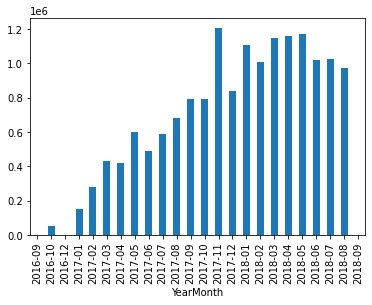

In [ ]:
#Dont Run This code
order_payment_process_lim.groupby('YearMonth')['Revenue'].sum().plot(kind='bar')

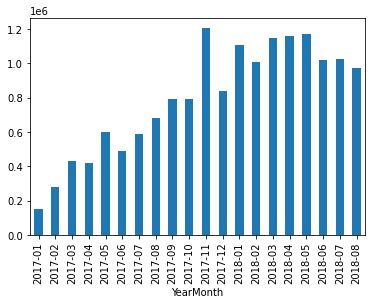

In [ ]:
#4.Due to after lanuching there was not much signicant sale in 2016, even no sale in 11 & 12/2016. Thus, only collect data from 01/2017 to 08/2018 which already remove order has status cancelled and unvailable.
order_payment_process_lim=order_payment_process_lim[(order_payment_process_lim['YearMonth'] >'2016-12') & (order_payment_process_lim['YearMonth'] < '2018-09')]
order_payment_process_lim.groupby('YearMonth')['Revenue'].sum().plot(kind='bar')


In [ ]:
how_order_payment_process_lim['Revenue'].sum()

1111507.88

# II. Analyse Customer Experience & Satisfaction by Delivery

---
1. Revenue breakdown by month
2. Internal process analyse
3. Deep dive:
- Tương quan thời gian giao hàng & revenue
- Tương quan thời gian giao hàng (đơn trễ) & review



# A1 - Customer Experience

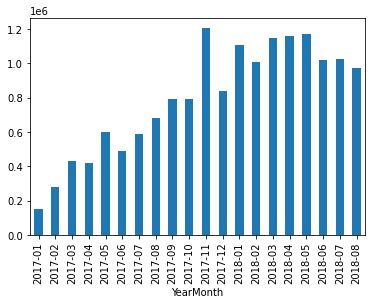

In [ ]:
#1.Monthly Revenue breakdown from 2017-08/2018
#During operation time, there was emerging growth 5 times after 8 months. After that there was a slightly drop but the monthly Revenue is around 8 Millions and above.
#Comparing 2017 VS 2018, we experience that from May to August has pattern of low sale season and gradually grown before hitting in last 3 months of the year.

order_payment_process_lim.groupby('YearMonth')['Revenue'].sum().plot(kind='bar')

In [ ]:
#2. Calculation internal processing order and leadtime.Only Select data has order has delivery status.
how_order_payment_process_lim = order_payment_process_lim[order_payment_process_lim['order_status'] == 'delivered']
how_order_payment_process_lim.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,Revenue,YearMonth
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06,29.99,8.72,1.0,credit_card,1.0,18.12,29.99,2017-10


In [ ]:
#comparision lead time for all order has status = deliveried
how_order_payment_process_lim['actual_process'] = how_order_payment_process_lim['order_delivered_customer_date'] - how_order_payment_process_lim['order_purchase_timestamp']
how_order_payment_process_lim['estimated_delivery_date'] = how_order_payment_process_lim['order_estimated_delivery_date'] - how_order_payment_process_lim['order_purchase_timestamp']
how_order_payment_process_lim['shipping'] = how_order_payment_process_lim['order_delivered_customer_date'] - how_order_payment_process_lim['order_delivered_carrier_date']
how_order_payment_process_lim['limited_shipping_date'] = how_order_payment_process_lim['shipping_limit_date'] - how_order_payment_process_lim['order_delivered_carrier_date']
how_order_payment_process_lim.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,Revenue,YearMonth,actual_process,estimated_delivery_date,shipping,limited_shipping_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06,29.99,8.72,1.0,credit_card,1.0,18.12,29.99,2017-10,8 days,16 days,6 days,2 days


In [ ]:
#Change days for calculation
how_order_payment_process_lim['actual_process'].dt.days
how_order_payment_process_lim['estimated_delivery_date'].dt.days

0         16
1         16
2         16
3         20
4         27
          ..
118429    24
118430    31
118431    38
118432    38
118433    26
Name: estimated_delivery_date, Length: 114704, dtype: int64

In [ ]:
#Classified delivery leadtime compare to customer expectation when system notified to customers when they place order
def check_due(row):
    
    if row['actual_process'] > row['estimated_delivery_date']:
        return 'Late'
    else: # row['actual_process'] < row['estimated_delivery_date']:
        return 'On-time'

In [ ]:
#Leadtime status overall
how_order_payment_process_lim['delivery_status'] = how_order_payment_process_lim.apply(check_due, axis=1)
how_order_payment_process_lim['delivery_status'].value_counts().loc['Late']/how_order_payment_process_lim['delivery_status'].value_counts().loc['On-time']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.07019966411643963

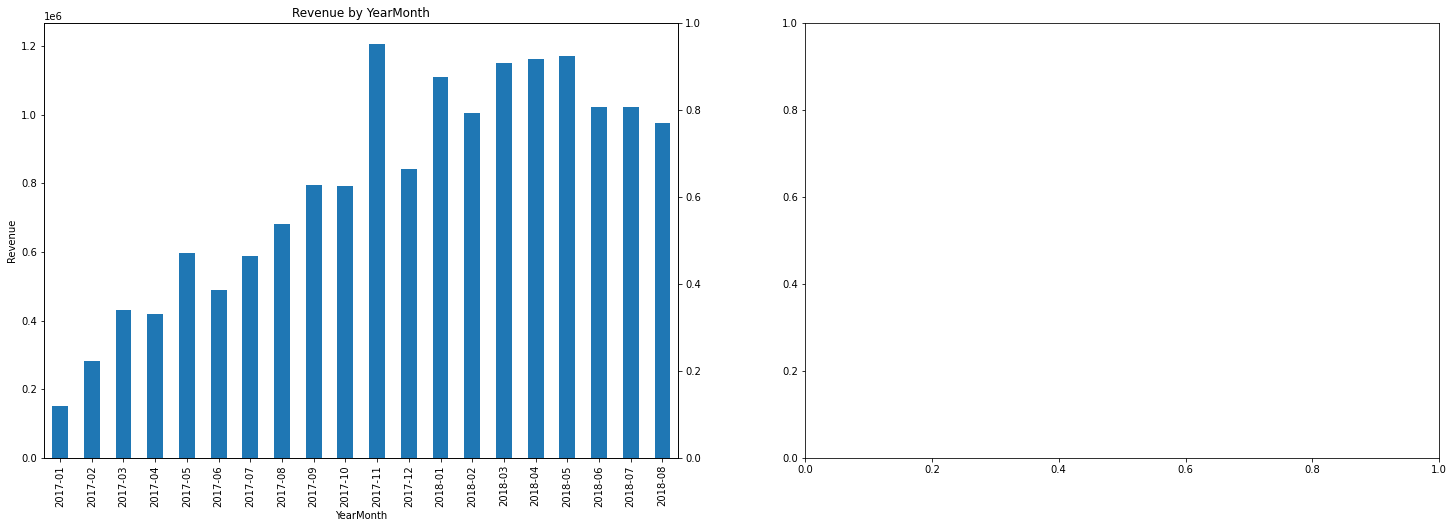

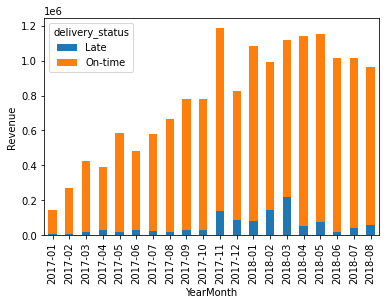

In [ ]:
#3.Relation between monthly Revenue ~ Delivery leadtime
plt.figure(figsize=(25,8))
plt.subplot(121)
order_payment_process_lim.groupby('YearMonth')['Revenue'].sum().plot(kind='bar')
plt.title('Revenue by YearMonth')
plt.ylabel('Revenue')

plt.twinx()
plt.subplot(122) 
pd.pivot_table(how_order_payment_process_lim,
                index='YearMonth',
                columns='delivery_status',
                values='Revenue',
                aggfunc='sum').plot(kind='bar', stacked=True)
plt.ylabel('Revenue')

plt.show()

Overall, the late delivery compare to customer expectation is at 7% compare to On-time delivery. This could be a reason while this Ecoomerce perfomance well in Brazil for a short time. They was able provide an excellent delivery service within leadtime as promised to customers.

However, from 2017-11 to 2018-03 there was an inreasing of late delivery and also during these peak sale season of the year. 

After 2018-03, the late delivery had declined but extremly but compare to last year 2017 still higher. 

Inclusion, maybe we should have an optimise process to improve the delivery leadtime since Revenue showed decline trend after 2018-05.

In [ ]:
#Xác định nguyên nhân trễ (so sánh actual time vs shipping limit date => nếu phải thì là do shipper => nếu ko phải thì là do hệ thống hoặc seller)
def check_ship(row):
    
    if row['shipping'] > row['limited_shipping_date']:
        return 'Late'
    else: # row['shipping'] < row['limited_shipping_date']:
        return 'On-time'

In [ ]:
#79% shipping trễ hơn thời gian limit cho phép
how_order_payment_process_lim['shipping_status'] = how_order_payment_process_lim.apply(check_ship, axis=1)
how_order_payment_process_lim.head()
how_order_payment_process_lim.groupby('shipping_status')['order_id'].count().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,shipping_status,order_id
0,Late,83436
1,On-time,31268


In [ ]:
#100% lỗi đơn trễ là do shipping time cao hơn thời gian cho phép
how_order_payment_process_lim['shipping_status'] = how_order_payment_process_lim.apply(check_ship, axis=1)
how_order_payment_process_lim = how_order_payment_process_lim[(how_order_payment_process_lim['delivery_status'] == 'Late')]
how_order_payment_process_lim.groupby('shipping_status')['order_id'].count().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,shipping_status,order_id
0,Late,7508
1,On-time,16


# A2 - Customer Satisfaction

In [ ]:
#The relation between satisfaction & revenue (&actual process)

In [ ]:
#Merge Order & Seller & Review from 01/2017 to 08/2018
seller_review = pd.merge(left=how_order_payment_process_lim, 
                          right=order_reviews, 
                          on='order_id',
                          how='inner')
seller_review.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,Revenue,YearMonth,actual_process,estimated_delivery_date,limited_shipping_date,delivery_status,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,29.99,2017-10,8 days 10:28:40,15 days 13:03:27,1 days 15:12:15,On-time,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,29.99,2017-10,8 days 10:28:40,15 days 13:03:27,1 days 15:12:15,On-time,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,29.99,2017-10,8 days 10:28:40,15 days 13:03:27,1 days 15:12:15,On-time,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,118.70,2018-07,13 days 18:46:08,19 days 03:18:23,3 days 12:53:27,On-time,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,159.90,2018-08,9 days 09:27:40,26 days 15:21:11,4 days 19:05:23,On-time,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58


In [ ]:
seller_review = seller_review[['order_id','YearMonth', 'seller_id', 'Revenue', 'delivery_status', 'review_score']]
seller_review.head()

,order_id,YearMonth,seller_id,Revenue,delivery_status,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,On-time,4
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,On-time,4
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,On-time,4
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07,289cdb325fb7e7f891c38608bf9e0962,118.70,On-time,4
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,On-time,5


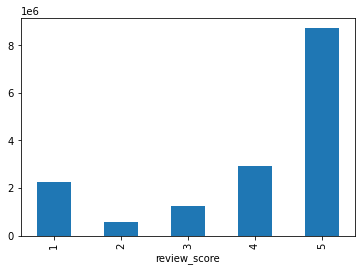

In [ ]:
#The relation between satisfaction & revenue
#Revenue ~ review score
#đơn mua rate 1 view nhiều tương đương đơn mua rate 4 view
seller_review.groupby('review_score')['Revenue'].sum().plot(kind='bar')

In [ ]:
#retention??????

#B - Analyse Customer Experience by Payment type

---
1. Nhận xét phương thức thanh toán được ưa chuộng nhất
2. Deep dive: tương quan giữa installments term và giá trị đơn hàng. Hay offer intallment 0% interest rate có ảnh hưởng tăng AOV hay không?( Average order value)


Text(0.5, 1.0, 'Revenue by Payment Type')

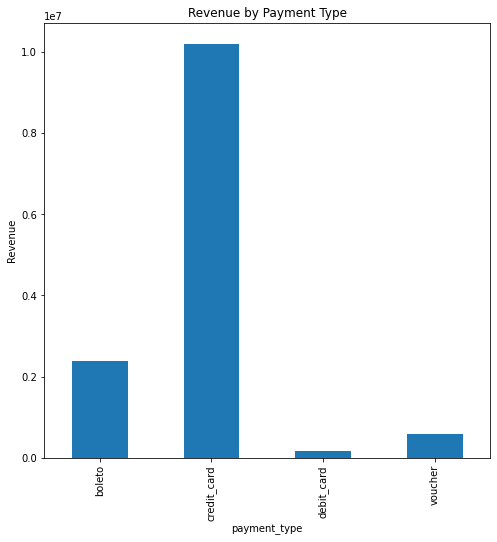

In [ ]:
# 1. Most polpular payment method on platform?
plt.figure(figsize=(8,8))
order_payment_process_lim.groupby('payment_type')['Revenue'].sum().plot(kind='bar')
plt.ylabel('Revenue')
plt.title('Revenue by Payment Type')
#Credit card is the number 1 choice for payment type on platform and this reflect that Brazil customers enjoy consuming on credit. 
#Boleto and debit card are both online cash payment method but boleto payment tyoe is one fifth compare to credit card and much more selected by customers compared to debit card.
#While voucher is also one of the options for consumer to enjoy shopping online.

In [ ]:
order_payment_process_lim.head(

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,Revenue,YearMonth
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06,29.99,8.72,1.0,credit_card,1.0,18.12,29.99,2017-10


In [ ]:
#Most of credit card type has function offer installment
order_payment_process_lim.groupby('payment_type')['payment_installments'].value_counts()

payment_type  payment_installments
boleto        1.0                     19156
credit_card   1.0                     23161
              2.0                     11476
              3.0                      9700
              4.0                      6601
              10.0                     5672
              5.0                      5043
              8.0                      4231
              6.0                      3876
              7.0                      1495
              9.0                       598
              12.0                      138
              15.0                       77
              18.0                       36
              24.0                       22
              11.0                       21
              20.0                       18
              13.0                       17
              14.0                       13
              17.0                        7
              16.0                        4
              0.0                        

In [ ]:
# How much Revenue contribute from Installment : 62% Revenue was contributed from Installment payment this can be an USP for platform to offer to customer 0% interest rate this can increase average order value per transaction.
installment_data = order_payment_process_lim[order_payment_process_lim['payment_installments'] > 1.0]
installment_data['Revenue'].sum()/order_payment_process_lim['Revenue'].sum()

0.6163610359698318

In [ ]:
QUESTION: how much order value customers will choose short term installment or long term installment?
#Group by paymnet term: 3months, 6 monhts,12 months and 24 months
def installment_term(x):
    
    if x <= 3.0:
        return '3M'
    elif (x > 3.0) & (x <= 6.0):
        return '6M' 
    elif (x > 6.0) & (x <= 12.0):
        return '12M'          
    else: 
        return '24M'

Object `installment` not found.


In [ ]:
#Apply on table: installment_data
installment_data['PayTerm']=installment_data['payment_installments'].apply(installment_term)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


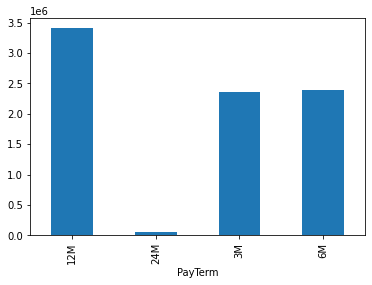

In [ ]:
#Revenue contribute by payment term
installment_data.groupby('PayTerm')['Revenue'].sum().plot(kind='bar')

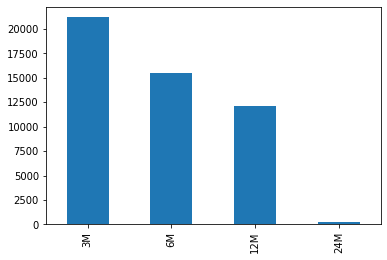

In [ ]:

installment_data['PayTerm'].value_counts().plot(kind='bar')

In [ ]:
installment_data.head(2)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,Revenue,YearMonth,PayTerm
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13,159.9,19.22,1.0,credit_card,3.0,179.12,159.9,2018-08,3M
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09,2017-07-09,2017-07-11,2017-07-26,2017-08-01,1.0,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13,147.9,27.36,1.0,credit_card,6.0,175.26,147.9,2017-07,6M


In [ ]:
# Calculate the quantiles -- Tính Q1 và Q3
q1 = installment_data['Revenue'].quantile(0.25)
q3 = installment_data['Revenue'].quantile(0.75)

# Calculate the interquantile range
iqr = q3 - q1

# Calculate the whisker
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

In [ ]:
upper

361.475

In [ ]:
lower

-122.48500000000001

In [ ]:
# Filter the data: abnormal data lies between lower and upper
abnormal = installment_data[(lower > installment_data['Revenue']) | (installment_data['Revenue'] > upper)]
abnormal

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,Revenue,YearMonth,PayTerm
20,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02,2018-01-02,2018-01-03,2018-01-20,2018-02-06,1.0,638bbb2a5e4f360b71f332ddfebfd672,c4af86330efa7a2620772227d2d670c9,2018-01-12,1299.00,77.45,1.0,credit_card,10.0,1376.45,1299.00,2018-01,12M
61,641fb0752bf5b5940c376b3a8bb9dc52,f5afca14dfa9dc64251cf2b45c54c363,delivered,2017-12-15,2017-12-15,2017-12-19,2018-01-03,2018-01-16,1.0,60184212dae4e6b0da32bf54271a8c4a,b33e7c55446eabf8fe1a42d037ac7d6d,2017-12-21,369.00,17.33,1.0,credit_card,10.0,386.33,369.00,2017-12,12M
74,688052146432ef8253587b930b01a06d,81e08b08e5ed4472008030d70327c71f,delivered,2018-04-22,2018-04-24,2018-04-23,2018-04-24,2018-05-15,2.0,db56f6d2b04c89eae4daba188842fd7b,2a84855fd20af891be03bc5924d2b453,2018-04-26,199.00,3.12,1.0,credit_card,3.0,346.09,398.00,2018-04,3M
76,f271576bed568e896f99eb710cd3a6f8,5dda11942d4f77bee3a46d71e442aec4,delivered,2018-01-07,2018-01-07,2018-01-10,2018-01-17,2018-02-14,2.0,d457916b4fdc60154ed93b5dd3e6fd69,76d64c4aca3a7baf218bf93ef7fa768d,2018-01-11,329.90,82.48,1.0,credit_card,4.0,824.76,659.80,2018-01,6M
115,f169bd689fb8b32ccd62df9050aebc0b,82f0b75bb50fcb30711e5277e36b3983,delivered,2018-04-22,2018-04-24,2018-04-27,2018-04-30,2018-05-07,1.0,20a8603c265d777e25da064113d556f5,e70053bf73d1b5863932e53a9fa47496,2018-04-29,759.00,13.08,1.0,credit_card,8.0,772.08,759.00,2018-04,12M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99359,7d71b84967ce50629f24530e64ba7938,ac9ae3c7de93573e219a1f10d7e71fca,delivered,2018-05-11,2018-05-12,2018-05-15,2018-05-21,2018-06-06,1.0,793a96e3c85c5553d7a9ab25dcf370d3,c35affa65afd250151285c5917fc1c8a,2018-05-16,499.99,69.17,1.0,credit_card,10.0,569.16,499.99,2018-05,12M
99367,c56e2c015a90b5df2c2564aa5f15be50,84bff9902277d3155c02447484e34dbb,delivered,2018-01-30,2018-01-31,2018-02-05,2018-03-09,2018-03-01,1.0,84d866290cb98a0253e770a862679579,b2ac621f0d0322434d04a12b078b9369,2018-02-07,399.00,46.64,1.0,credit_card,10.0,445.64,399.00,2018-01,12M
99375,6f82d9eeede34f94543730ab2db13732,bd51c278b0216610c52631720f4e87cc,delivered,2018-03-30,2018-03-30,2018-04-04,2018-04-25,2018-05-08,1.0,560ed840b584c6aef5c8959366dfd41e,5dceca129747e92ff8ef7a997dc4f8ca,2018-04-19,428.00,22.39,1.0,credit_card,9.0,450.39,428.00,2018-03,12M
99408,c0ed1e5690afee470f14fca47046cffe,8760984f53eafccf312ae7b0feb57400,delivered,2017-05-22,2017-05-22,2017-05-24,2017-05-31,2017-06-16,1.0,159dc4423e5092c3baa443379a458fa9,5c243662ce92d84573bfaff24c3e3700,2017-05-30,458.00,19.96,1.0,credit_card,5.0,477.96,458.00,2017-05,6M


In [ ]:
abnormal['Revenue'].mean()

729.1294623139677

In [ ]:
installment_data.max()

order_id                         fffe18544ffabc95dfada21779c9644f
customer_id                      ffffa3172527f765de70084a7e53aae8
order_status                                              shipped
order_purchase_timestamp                      2018-08-29 00:00:00
order_approved_at                             2018-08-29 00:00:00
order_delivered_carrier_date                  2018-09-03 00:00:00
order_delivered_customer_date                 2018-10-17 00:00:00
order_estimated_delivery_date                 2018-10-25 00:00:00
order_item_id                                                  15
shipping_limit_date                           2018-09-14 00:00:00
price                                                        6735
freight_value                                              409.68
payment_sequential                                              3
payment_type                                          credit_card
payment_installments                                           24
payment_va

In [ ]:
installment_data.min()

order_id                         00018f77f2f0320c557190d7a144bdd3
customer_id                      00012a2ce6f8dcda20d059ce98491703
order_status                                              created
order_purchase_timestamp                      2017-01-07 00:00:00
order_approved_at                             2017-01-07 00:00:00
order_delivered_carrier_date                  2017-01-09 00:00:00
order_delivered_customer_date                 2017-01-16 00:00:00
order_estimated_delivery_date                 2017-02-07 00:00:00
order_item_id                                                   1
shipping_limit_date                           2017-01-11 00:00:00
price                                                        3.49
freight_value                                                   0
payment_sequential                                              1
payment_type                                          credit_card
payment_installments                                            2
payment_va

# APPENDIX

In [ ]:
#2a - Phương thức thanh toán nào có số lần order nhiều nhất? categoried by new order (sequential = 1) và return oder (sequential != 1)
#2b - Phương thức thanh toán nào contribute revenue nhiều nhất?
order_payments['avg_value'] = order_payments['payment_value'] / order_payments['payment_sequential']
order_payments

plot_data = order_payments.groupby('payment_type')[['payment_sequential', 'avg_value']].agg({'payment_sequential':'sum', 
                                                                                      'avg_value':'mean'}).reset_index() 
plt.figure(figsize=(8, 10))
sns.barplot(data=plot_data,
              x='payment_type',
              y='avg_value')
plt.twinx()
sns.lineplot(data=plot_data,
             x='payment_type',
             y='payment_sequential')
plt.show()